# <a id='toc1_'></a>[Final Report (1 of 3)](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Final Report (1 of 3)](#toc1_)    
  - [I. Data Preparation](#toc1_1_)    
    - [I.1. Data import](#toc1_1_1_)    
    - [I.2. Overview of the dataset](#toc1_1_2_)    
      - [I.2.1. Check column data types](#toc1_1_2_1_)    
      - [I.2.2. Drop columns](#toc1_1_2_2_)    
    - [I.3. Data security measures](#toc1_1_3_)    
      - [I.3.1. Check for PII data](#toc1_1_3_1_)    
      - [I.3.2. Create a subset without PII data](#toc1_1_3_2_)    
  - [II. Data Analysis](#toc1_2_)    
    - [II.1. Comparison of customer behavior in different geographic areas](#toc1_2_1_)    
      - [II.1.1. Create a regional segmentation of the data](#toc1_2_1_1_)    
      - [II.1.2. Determine whether there’s a difference in spending habits between the different U.S. regions](#toc1_2_1_2_)    
    - [II.2. Segmentation of customers who don't generate much revenue for the app](#toc1_2_2_)    
      - [II.2.1. Create an exclusion flag for low-activity customers (customers with fewer than 5 orders)](#toc1_2_2_1_)    
      - [II.2.2. Exclude low activity customers from the data](#toc1_2_2_2_)    
    - [II.3. Customer profiling](#toc1_2_3_)    
      - [II.3.1. Create a profiling variable based on age, income, family status, number of dependants and certain goods in the 'department_id' column](#toc1_2_3_1_)    
        - [II.3.1.1. Customer segmentation based on age](#toc1_2_3_1_1_)    
        - [II.3.1.2. Customer segmentation based on income](#toc1_2_3_1_2_)    
        - [II.3.1.3. Customer segmentation based on family status and number of dependants](#toc1_2_3_1_3_)    
  - [III. Data Export](#toc1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[I. Data Preparation](#toc0_)

### <a id='toc1_1_1_'></a>[I.1. Data import](#toc0_)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create a path to the directory
path = r'C:\Users\Ansgar.S\Uyen\OneDrive\Documents\Data Immersion\Achievement IV - Python Fundamentals for Data Analysts\02-2023 Instacart Basket Analysis'

# import the 'orders_products_merged_4.pkl' dataset
df_ords_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_4.pkl'))

# import the 'departments_wrangled.csv' dataset
df_deps = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

### <a id='toc1_1_2_'></a>[I.2. Overview of the dataset](#toc0_)

In [3]:
# make sure pandas display all columns
pd.set_option('display.max_columns', None)

In [4]:
# check number of rows and columns in df_ords_merged
print('Number of rows and columns in df_ords_merged:')
df_ords_merged.shape

Number of rows and columns in df_ords_merged:


(30629741, 34)

In [5]:
# check the outputs of df_ords_merged
print('Sample outputs of df_ords_merged:')
df_ords_merged.sample(5)

Sample outputs of df_ords_merged:


,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,add_to_cart_order,reordered,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_freq,order_freq_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge
3468745,35951,Organic Unsweetened Almond Milk,91,16,1.3,769816,17489,8,6,12,27.0,False,22,1,Low-range product,Regularly busy,Regular days,Most orders,8,New customer,7.942920,Low spender,27.0,Non-frequent customer,Kathy,Gordon,Female,Virginia,25,6/30/2018,0,single,87423,both
17059917,8536,Green Leaf Shreds,123,4,6.1,579881,119515,63,5,9,3.0,False,5,1,Mid-range product,Regularly busy,Regular days,Most orders,93,Loyal customer,7.922629,Low spender,3.0,Frequent customer,Victor,Burke,Male,Nebraska,79,1/22/2018,3,married,121235,both
8507761,27845,Organic Whole Milk,84,16,12.8,2908990,72631,10,2,13,28.0,False,3,1,Mid-range product,Regularly busy,Regular days,Most orders,12,Regular customer,8.890071,Low spender,18.0,Regular customer,Amy,Ware,Female,Connecticut,57,1/19/2019,2,married,127384,both
8983714,8424,Broccoli Crown,83,4,5.5,2002693,71151,17,4,15,8.0,False,8,1,Mid-range product,Least busy,Slowest days,Most orders,40,Regular customer,7.855134,Low spender,7.0,Frequent customer,Annie,Garrison,Female,Colorado,29,2/26/2017,3,married,82191,both
30227033,25938,Peru Sweet Onions,83,4,10.6,2646068,41758,2,4,12,7.0,False,4,0,Mid-range product,Least busy,Slowest days,Most orders,5,New customer,9.100000,Low spender,28.0,Non-frequent customer,Christina,Friedman,Female,Rhode Island,67,9/12/2017,3,married,112408,both


In [6]:
# descriptive statistics on df_ords_merged
print('Descriptive statistics on df_ords_merged:')
df_ords_merged.describe().apply(lambda s: s.apply('{0:.2f}'.format))

Descriptive statistics on df_ords_merged:


,prices,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,avg_price,order_freq,age,number_of_dependants,income
count,30629741.00,30629741.00,30629741.00,30629741.00,28667038.00,30629741.00,30629741.00,30629741.00,30629741.00,30629736.00,30629741.00,30629741.00,30629741.00
mean,7.79,17.12,2.74,13.43,11.11,8.35,0.59,33.01,7.79,10.41,49.47,1.50,99459.80
std,4.24,17.52,2.09,4.24,8.78,7.13,0.49,25.12,0.73,7.13,18.48,1.12,43066.26
min,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,18.00,0.00,25903.00
25%,4.20,5.00,1.00,10.00,5.00,3.00,0.00,13.00,7.38,6.00,33.00,1.00,67066.00
50%,7.40,11.00,3.00,13.00,8.00,6.00,1.00,26.00,7.81,8.00,49.00,2.00,96612.00
75%,11.30,24.00,5.00,16.00,15.00,11.00,1.00,47.00,8.23,13.00,65.00,3.00,127934.00
max,25.00,99.00,6.00,23.00,30.00,145.00,1.00,99.00,23.20,30.00,81.00,3.00,593901.00


#### <a id='toc1_1_2_1_'></a>[I.2.1. Check column data types](#toc0_)

In [7]:
# check column data types in df_ords_merged
print('Column data types in df_ords_merged:')
df_ords_merged.dtypes

Column data types in df_ords_merged:


product_id                  object
product_name                object
aisle_id                    object
department_id               object
prices                     float64
order_id                    object
user_id                     object
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
first_purchase                bool
add_to_cart_order            int64
reordered                    int64
price_range                 object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
avg_price                  float64
spending_flag               object
order_freq                 float64
order_freq_flag             object
first_name                  object
last_name                   object
gender                      object
state                       object
age                 

#### <a id='toc1_1_2_2_'></a>[I.2.2. Drop columns](#toc0_)

In [8]:
# drop column '_merge'
df_ords_merged = df_ords_merged.drop(columns = ['_merge'])

### <a id='toc1_1_3_'></a>[I.3. Data security measures](#toc0_)

#### <a id='toc1_1_3_1_'></a>[I.3.1. Check for PII data](#toc0_)

In [9]:
# check the columns of df_ords_merged
print('Columns of df_ords_merged:')
df_ords_merged.columns

Columns of df_ords_merged:


Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_purchase',
       'add_to_cart_order', 'reordered', 'price_range', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'order_freq', 'order_freq_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income'],
      dtype='object')

**Observation**: Columns 'first_name' and 'last_name' contain PII data and therefore should not be included in any analysis for data security reasons.

#### <a id='toc1_1_3_2_'></a>[I.3.2. Create a subset without PII data](#toc0_)

In [10]:
# create dataframe df_secured from df_ords_merged that excludes columns 'first_name' and 'last_name'
df_secured = df_ords_merged.drop(['first_name', 'last_name'], axis = 1)

In [11]:
# check the dimensions of df_secured
print('Dimensions of df_secured:')
df_secured.shape

Dimensions of df_secured:


(30629741, 31)

In [12]:
# check sampled outputs in df_secured
print('Sampled outputs in df_secured:')
df_secured.sample(5)

Sampled outputs in df_secured:


,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,add_to_cart_order,reordered,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_freq,order_freq_flag,gender,state,age,date_joined,number_of_dependants,family_status,income
27467798,1940,Organic 2% Reduced Fat Milk,84,16,9.1,3003648,26182,3,1,20,8.0,False,4,1,Mid-range product,Regularly busy,Busiest days,Average orders,3,New customer,7.587879,Low spender,28.0,Non-frequent customer,Female,Louisiana,50,9/16/2018,2,married,136452
9778067,24838,Unsweetened Almondmilk,91,16,5.3,782018,43365,61,6,19,1.0,False,7,1,Mid-range product,Regularly busy,Regular days,Average orders,88,Loyal customer,7.639694,Low spender,4.0,Frequent customer,Female,Indiana,64,3/9/2019,0,divorced/widowed,135655
1963101,25246,White Cheddar Macaroni & Cheese Cups,4,9,1.5,3197892,36310,43,4,15,3.0,False,5,0,Low-range product,Least busy,Slowest days,Most orders,60,Loyal customer,7.824595,Low spender,5.0,Frequent customer,Female,West Virginia,29,12/19/2017,0,single,65970
23815559,17461,Air Chilled Organic Boneless Skinless Chicken ...,35,12,9.1,478383,23493,2,1,10,13.0,False,1,0,Mid-range product,Regularly busy,Busiest days,Most orders,13,Regular customer,8.043678,Low spender,9.0,Frequent customer,Male,Maryland,63,8/22/2017,2,married,168596
11993529,6104,Whole Milk Plain Yogurt,120,16,3.9,649839,181155,22,1,10,14.0,False,9,1,Low-range product,Regularly busy,Busiest days,Most orders,68,Loyal customer,7.753407,Low spender,5.0,Frequent customer,Female,Arizona,27,5/24/2018,0,single,82545


## <a id='toc1_2_'></a>[II. Data Analysis](#toc0_)

### <a id='toc1_2_1_'></a>[II.1. Comparison of customer behavior in different geographic areas](#toc0_)

#### <a id='toc1_2_1_1_'></a>[II.1.1. Create a regional segmentation of the data](#toc0_)

In [13]:
# create a data dictionary containing US regions and their corresponding states according to Wikipedia
us_regions = {
    'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'],
    'Midwest': ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'],
    'South': ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'],
    'West': ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
}

In [14]:
# create column 'region' in df_secured
df_secured['region'] = df_secured['state'].map(lambda x: next((region for region, states in us_regions.items() if x in states), None))

In [15]:
# check columns 'state' and 'region' in df_secured
print('Check columns state and region in df_secured:')
df_secured[['state', 'region']].sample(5)

Check columns state and region in df_secured:


,state,region
3003013,Georgia,South
14263175,New York,Northeast
4766791,New Jersey,Northeast
4089997,Oregon,West
306745,Virginia,South


#### <a id='toc1_2_1_2_'></a>[II.1.2. Determine whether there’s a difference in spending habits between the different U.S. regions](#toc0_)

In [16]:
# check columns 'region' and 'spending_flag' in df_secured
print('Columns region and spending_flag in df_secured:')
df_secured[['region', 'spending_flag']].sample(5)

Columns region and spending_flag in df_secured:


,region,spending_flag
12686173,Midwest,Low spender
6454665,South,Low spender
13623883,West,Low spender
12635404,Midwest,Low spender
218532,West,Low spender


In [17]:
# group data by column 'region', then calculate count of values in column 'spending_flag'
print('Values counts of spending_flag grouped by region with unique user_id:')
df_secured.drop_duplicates(subset=['user_id']).groupby('region').agg({'spending_flag': ['value_counts']})

Values counts of spending_flag grouped by region with unique user_id:


spending_flag
                         value_counts
region    spending_flag              
Midwest   Low spender           45101
          High spender            767
Northeast Low spender           33940
          High spender            506
South     Low spender           63897
          High spender           1084
West      Low spender           48813
          High spender            842

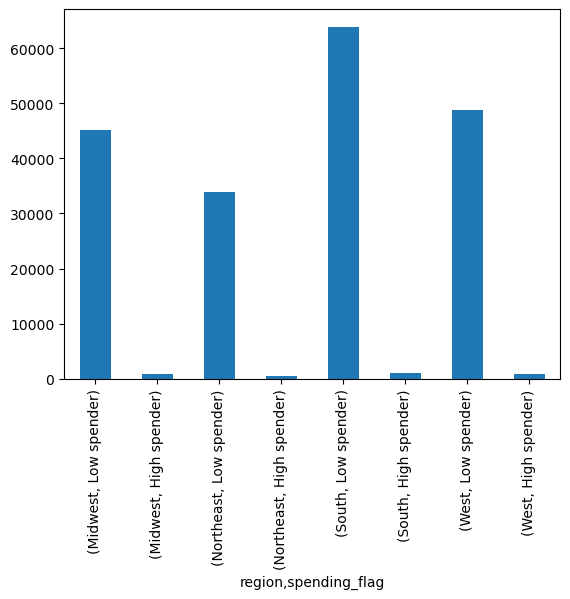

In [18]:
# create a bar chart for column 'spending_flag'
bar_region_spending = df_secured.drop_duplicates(subset=['user_id']).groupby('region')['spending_flag'].value_counts().plot.bar()

**Observation**:
Based on the given data, it appears that there is a difference in spending habits between the different U.S. regions.

The number of low spenders is much higher in all regions compared to high spenders, which is expected. However, the absolute number of high spenders is different across regions. Region 1 and Region 4 have the lowest number of high spenders, whereas Region 3 has the highest number of high spenders.

### <a id='toc1_2_2_'></a>[II.2. Segmentation of customers who don't generate much revenue for the app](#toc0_)

#### <a id='toc1_2_2_1_'></a>[II.2.1. Create an exclusion flag for low-activity customers (customers with fewer than 5 orders)](#toc0_)

In [19]:
# check the outputs of df_secured
print('Sampled outputs of df_secured:')
df_secured.sample(5)

Sampled outputs of df_secured:


,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,add_to_cart_order,reordered,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_freq,order_freq_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region
12338793,14332,Organic Yellow Mustard,72,13,3.7,1258276,54064,7,5,17,7.0,False,4,1,Low-range product,Regularly busy,Regular days,Average orders,36,Regular customer,8.038323,Low spender,10.0,Frequent customer,Male,Arkansas,71,12/27/2017,0,divorced/widowed,110179,South
25912585,14702,Maple Honey Ham,96,20,14.4,2509017,171227,25,0,17,8.0,False,4,1,Mid-range product,Busiest day,Busiest days,Average orders,37,Regular customer,7.913548,Low spender,7.0,Frequent customer,Female,Maine,31,3/10/2018,0,single,83432,Northeast
23295904,18234,Organic Spinach Bunch,83,4,6.6,1745514,192917,4,5,7,5.0,False,1,1,Mid-range product,Regularly busy,Regular days,Average orders,21,Regular customer,7.198571,Low spender,14.0,Regular customer,Male,Michigan,41,2/3/2019,3,married,114383,Midwest
27587051,38108,Sausage Buns,43,3,3.8,3123603,163401,22,0,14,7.0,False,6,1,Low-range product,Busiest day,Busiest days,Most orders,28,Regular customer,7.575460,Low spender,7.0,Frequent customer,Female,Washington,70,7/10/2018,2,married,105228,West
23798937,48197,Goat Milk Butter European Style,36,16,10.0,87322,86545,18,3,10,14.0,False,10,1,Mid-range product,Regularly busy,Slowest days,Most orders,18,Regular customer,7.890725,Low spender,20.0,Regular customer,Male,West Virginia,26,12/18/2018,0,single,47943,South


In [20]:
# create column 'low_activity_flag' based on each user's maximum order value
df_secured.loc[df_secured['max_order'] <5, 'low_activity_flag'] = 'Low activity'
df_secured.loc[df_secured['max_order'] >= 5, 'low_activity_flag'] = 'High activity'

In [21]:
# check columns 'user_id', 'max_order' and 'low_activity_flag' in df_secured
print('Columns user_id, max_order and low_activity_flag in df_secured:')
df_secured[['user_id', 'max_order', 'low_activity_flag']].sample(5)

Columns user_id, max_order and low_activity_flag in df_secured:


,user_id,max_order,low_activity_flag
29937599,176913,5,High activity
21370990,200427,57,High activity
26060595,50519,27,High activity
17788154,141230,21,High activity
29839153,100991,7,High activity


#### <a id='toc1_2_2_2_'></a>[II.2.2. Exclude low activity customers from the data](#toc0_)

In [22]:
# create dataframe df_secured_high_activity that excludes low activity customers from df_secured
df_secured_high_activity = df_secured.loc[~df_secured['low_activity_flag'].isin(['Low activity'])].copy()

In [23]:
# check the outputs of df_secured_high_activity
print('Sampled outputs of df_secured_high_activity:')
df_secured_high_activity.sample(5)

Sampled outputs of df_secured_high_activity:


,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,add_to_cart_order,reordered,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_freq,order_freq_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region,low_activity_flag
5246494,42352,Swedish Meatballs,38,1,8.0,2973817,199336,3,6,16,4.0,False,4,0,Mid-range product,Regularly busy,Regular days,Most orders,39,Regular customer,6.215185,Low spender,6.0,Frequent customer,Male,North Carolina,59,12/2/2019,0,single,45394,South,High activity
562048,15984,Almond Milk Blueberry Yogurt,120,16,9.6,360831,166894,11,3,12,8.0,False,26,0,Mid-range product,Regularly busy,Slowest days,Most orders,30,Regular customer,8.440735,Low spender,7.0,Frequent customer,Female,Nebraska,38,2/18/2019,0,single,67552,Midwest,High activity
17872863,47766,Organic Avocado,24,4,6.3,1494115,112982,2,3,10,12.0,False,2,0,Mid-range product,Regularly busy,Slowest days,Most orders,5,New customer,9.027778,Low spender,12.0,Regular customer,Female,Kansas,44,6/27/2018,1,married,139719,Midwest,High activity
4212280,42768,Organic Garbanzo Beans,59,15,7.3,197948,205822,5,5,9,3.0,False,10,0,Mid-range product,Regularly busy,Regular days,Most orders,24,Regular customer,7.901714,Low spender,7.5,Frequent customer,Male,Mississippi,24,5/30/2019,0,single,57322,South,High activity
21181947,13176,Bag of Organic Bananas,24,4,10.3,35439,96244,18,0,13,6.0,False,2,1,Mid-range product,Busiest day,Busiest days,Most orders,18,Regular customer,8.204843,Low spender,14.0,Regular customer,Male,Connecticut,65,11/3/2017,3,married,135144,Northeast,High activity



### <a id='toc1_2_3_'></a>[II.3. Customer profiling](#toc0_)

#### <a id='toc1_2_3_1_'></a>[II.3.1. Create a profiling variable based on age, income, family status, number of dependants and certain goods in the 'department_id' column](#toc0_)

##### <a id='toc1_2_3_1_1_'></a>[II.3.1.1. Customer segmentation based on age](#toc0_)

In [24]:
# column 'age' in df_secured_high_activity grouped by column 'user_id'
print('Age in df_secured_high_activity grouped by column user_id:')
df_secured_high_activity.groupby('user_id').agg({'age': ['count', 'first']})

Age in df_secured_high_activity grouped by column user_id:


age      
        count first
user_id            
1          59    31
10        143    34
100        27    64
1000      103    25
10000    1092    33
...       ...   ...
99994     164    78
99995      50    43
99996     128    41
99998      21    38
99999     329    40

[153805 rows x 2 columns]

In [25]:
# descriptive statistics of column 'age' in df_secured_high_activity
print('Descriptive statistics of column age in df_secured_high_activity:')
df_secured_high_activity['age'].describe().apply(lambda x: format(x, '.2f'))

Descriptive statistics of column age in df_secured_high_activity:


count    29270938.00
mean           49.48
std            18.48
min            18.00
25%            34.00
50%            49.00
75%            65.00
max            81.00
Name: age, dtype: object

**Observation**: The age of customers varies from 18 to 81. As a result, suggested age brackets are:

- Young adults: ages 18-29
- Middle-aged adults: ages 30-49
- Seniors: ages 50 and above

In [26]:
# create column 'age_bracket' based on each user's age
df_secured_high_activity.loc[(18 <= df_secured_high_activity['age']) & (df_secured_high_activity['age'] <= 29), 'age_bracket'] = 'Young adult'
df_secured_high_activity.loc[(30 <= df_secured_high_activity['age']) & (df_secured_high_activity['age'] <= 49), 'age_bracket'] = 'Middle-aged adult'
df_secured_high_activity.loc[(df_secured_high_activity['age'] >= 50), 'age_bracket'] = 'Senior'

In [27]:
# check columns 'user_id', 'age' and 'age_bracket' in df_secured_high_activity
print('Columns user_id, age and age_bracket in df_secured_high_activity:')
df_secured_high_activity[['user_id', 'age', 'age_bracket']].sample(5)

Columns user_id, age and age_bracket in df_secured_high_activity:


,user_id,age,age_bracket
23315494,202564,32,Middle-aged adult
12858654,166586,44,Middle-aged adult
16710216,199897,30,Middle-aged adult
24430973,10215,70,Senior
13356618,51942,36,Middle-aged adult


In [28]:
# check the count of unique user_id by age_bracket
print('Count of unique user_id by age_bracket:')
df_secured_high_activity.drop_duplicates(subset='user_id')['age_bracket'].value_counts()

Count of unique user_id by age_bracket:


Senior               76926
Middle-aged adult    48180
Young adult          28699
Name: age_bracket, dtype: int64

##### <a id='toc1_2_3_1_2_'></a>[II.3.1.2. Customer segmentation based on income](#toc0_)

In [29]:
# descriptive statistics of column 'income' in df_secured_high_activity
print('Descriptive statistics of column income in df_secured_high_activity:')
df_secured_high_activity['income'].describe().apply(lambda x: format(x, '.2f'))

Descriptive statistics of column income in df_secured_high_activity:


count    29270938.00
mean        99696.92
std         43148.45
min         25903.00
25%         67367.00
50%         96763.00
75%        128139.00
max        593901.00
Name: income, dtype: object

**Observation**: The income of customers varies considerably, with a standard deviation of 43148.45. Demographic segmentation therefore will contain the following income brackets:

- Low income: less than $30,000
- Lower-middle income: $30,000 - $49,999
- Upper-middle income: $50,000 - $99,999
- High income: $100,000 - $149,999
- Very high income: greater than $150,000

In [30]:
# create column 'income_bracket' based on each user's income
df_secured_high_activity.loc[df_secured_high_activity['income'] < 30000, 'income_bracket'] = 'Low income'
df_secured_high_activity.loc[(df_secured_high_activity['income'] >= 30000) & (df_secured_high_activity['income'] < 50000), 'income_bracket'] = 'Lower-middle income'
df_secured_high_activity.loc[(df_secured_high_activity['income'] >= 50000) & (df_secured_high_activity['income'] < 100000), 'income_bracket'] = 'Upper-middle income'
df_secured_high_activity.loc[(df_secured_high_activity['income'] >= 100000) & (df_secured_high_activity['income'] < 150000), 'income_bracket'] = 'High income'
df_secured_high_activity.loc[df_secured_high_activity['income'] >= 150000, 'income_bracket'] = 'Very high income'

In [31]:
# check columns 'user_id', 'income' and 'income_bracket' in df_secured_high_activity
print('Columns user_id, income and income_bracket in df_secured_high_activity:')
df_secured_high_activity[['user_id', 'income', 'income_bracket']].sample(5)

Columns user_id, income and income_bracket in df_secured_high_activity:


,user_id,income,income_bracket
16114580,120245,89160,Upper-middle income
12761496,178611,168258,Very high income
10443811,167355,86559,Upper-middle income
4123967,139935,98597,Upper-middle income
17623458,175286,97153,Upper-middle income


In [32]:
# check the count of unique user_id by income_bracket
print('Count of unique user_id by income_bracket:')
df_secured_high_activity.drop_duplicates(subset='user_id')['income_bracket'].value_counts()

Count of unique user_id by income_bracket:


Upper-middle income    63703
High income            48461
Lower-middle income    22314
Very high income       17866
Low income              1461
Name: income_bracket, dtype: int64

##### <a id='toc1_2_3_1_3_'></a>[II.3.1.3. Customer segmentation based on family status and number of dependants](#toc0_)

In [33]:
# check columns 'user_id', 'family_status' and 'number_of_dependants' in df_secured_high_activity
print('Columns user_id, family_status and number_of_dependants in df_secured_high_activity:')
df_secured_high_activity[['user_id', 'family_status', 'number_of_dependants']].sample(5)

Columns user_id, family_status and number_of_dependants in df_secured_high_activity:


,user_id,family_status,number_of_dependants
14466418,205754,married,3
9593062,45153,divorced/widowed,0
22840179,8706,married,3
5926994,173423,married,2
1322890,26455,single,0


In [34]:
# check the count of unique user_id by family_status
print('Count of unique user_id by family_status:')
df_secured_high_activity.drop_duplicates(subset='user_id')['family_status'].value_counts()

Count of unique user_id by family_status:


married                             108112
single                               25411
divorced/widowed                     13084
living with parents and siblings      7198
Name: family_status, dtype: int64

In [35]:
# check the count of unique user_id by number_of_dependants
print('Count of unique user_id by number_of_dependants:')
df_secured_high_activity.drop_duplicates(subset='user_id')['number_of_dependants'].value_counts()

Count of unique user_id by number_of_dependants:


1    38514
0    38495
2    38451
3    38345
Name: number_of_dependants, dtype: int64

In [36]:
# create a crosstab of number_of_dependants and family_status with unique user_id
family_crosstab = pd.crosstab(
    df_secured_high_activity.drop_duplicates(subset='user_id')['family_status'], 
    df_secured_high_activity.drop_duplicates(subset='user_id')['number_of_dependants'], 
    dropna = False
    )

In [37]:
print('Crosstab of family_size and family_status with unique user_id:')
family_crosstab

Crosstab of family_size and family_status with unique user_id:


number_of_dependants,0,1,2,3
family_status,,,,
divorced/widowed,13084,0,0,0
living with parents and siblings,0,2421,2404,2373
married,0,36093,36047,35972
single,25411,0,0,0


**Observation**: Based on the provided data, the following customer segments can be identified based on family status and number of dependants:
- Divorced/widowed with no children: divorced/widowed & 0 dependant
- Living with family: living with parents and siblings & 1, 2 or 3 dependants
- Married with no children: married & 1 dependant
- Married with children: married & 2-3 dependants
- Single with no children: single & 0 dependant

In [38]:
# create column 'family_type' based on each user's number of dependants and family status
df_secured_high_activity.loc[(df_secured_high_activity['family_status'] == 'divorced/widowed') & (df_secured_high_activity['number_of_dependants'] == 0), 'family_type'] = 'Divorced/widowed with no children'
df_secured_high_activity.loc[(df_secured_high_activity['family_status'] == 'living with parents and siblings') & (df_secured_high_activity['number_of_dependants'] >= 1) & (df_secured_high_activity['number_of_dependants'] <= 3), 'family_type'] = 'Living with family'
df_secured_high_activity.loc[(df_secured_high_activity['family_status'] == 'married') & (df_secured_high_activity['number_of_dependants'] == 1), 'family_type'] = 'Married with no children'
df_secured_high_activity.loc[(df_secured_high_activity['family_status'] == 'married') & (df_secured_high_activity['number_of_dependants'] >= 2), 'family_type'] = 'Married with children'
df_secured_high_activity.loc[(df_secured_high_activity['family_status'] == 'single') & (df_secured_high_activity['number_of_dependants'] == 0), 'family_type'] = 'Single with no children'

In [39]:
# check columns 'user_id', 'number_of_dependants', 'family_status' and 'family_type' in df_secured_high_activity
print('Columns user_id, number_of_dependants, family_status and family_type in df_secured_high_activity:')
df_secured_high_activity[['user_id', 'number_of_dependants', 'family_status', 'family_type']].sample(5)

Columns user_id, number_of_dependants, family_status and family_type in df_secured_high_activity:


,user_id,number_of_dependants,family_status,family_type
6913153,160359,2,married,Married with children
13454302,67418,2,married,Married with children
8148144,195066,2,living with parents and siblings,Living with family
22463280,162205,1,married,Married with no children
10093596,74954,0,divorced/widowed,Divorced/widowed with no children


In [40]:
# check the count of unique user_id by family_type
print('Count of unique user_id by family_type:')
df_secured_high_activity.drop_duplicates(subset='user_id')['family_type'].value_counts()

Count of unique user_id by family_type:


Married with children                72019
Married with no children             36093
Single with no children              25411
Divorced/widowed with no children    13084
Living with family                    7198
Name: family_type, dtype: int64

## <a id='toc1_3_'></a>[III. Data Export](#toc0_)

In [41]:
# export bar chart bar_region_spending
bar_region_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spending.png'))

In [42]:
# export df_secured_high_activity in .pkl format
df_secured_high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_secured_high_activity.pkl'))